Generate thorough report of financial option chain

Critical Rupture Event Predictions:
    Expiration Date                Calls   Gamma  Volume  \
31  Fri Jan 10 2025  PLTR250110C00080000  0.0719   12781   
32  Fri Jan 10 2025  PLTR250110C00081000  0.0710    4847   
30  Fri Jan 10 2025  PLTR250110C00079000  0.0703    5859   
33  Fri Jan 10 2025  PLTR250110C00081500  0.0698    2383   
34  Fri Jan 10 2025  PLTR250110C00082000  0.0680    5068   
29  Fri Jan 10 2025  PLTR250110C00078000  0.0665   10212   
35  Fri Jan 10 2025  PLTR250110C00083000  0.0632    4190   
28  Fri Jan 10 2025  PLTR250110C00077000  0.0606    4977   
36  Fri Jan 10 2025  PLTR250110C00084000  0.0570    2527   
27  Fri Jan 10 2025  PLTR250110C00076000  0.0533    3790   
37  Fri Jan 10 2025  PLTR250110C00085000  0.0502    7249   

               Predicted Event Range  
31  Within 1-3 days post Gamma spike  
32  Within 1-3 days post Gamma spike  
30  Within 1-3 days post Gamma spike  
33  Within 1-3 days post Gamma spike  
34  Within 1-3 days post Gamma spike  
29  Withi

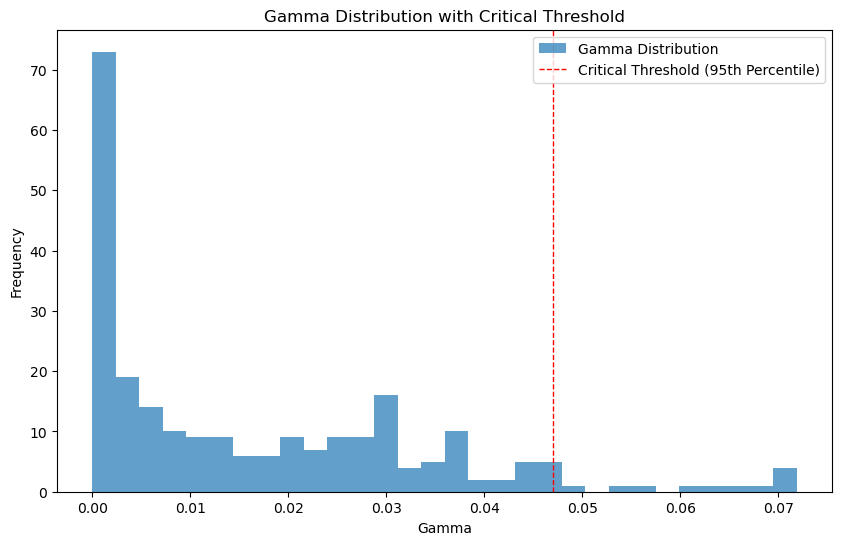

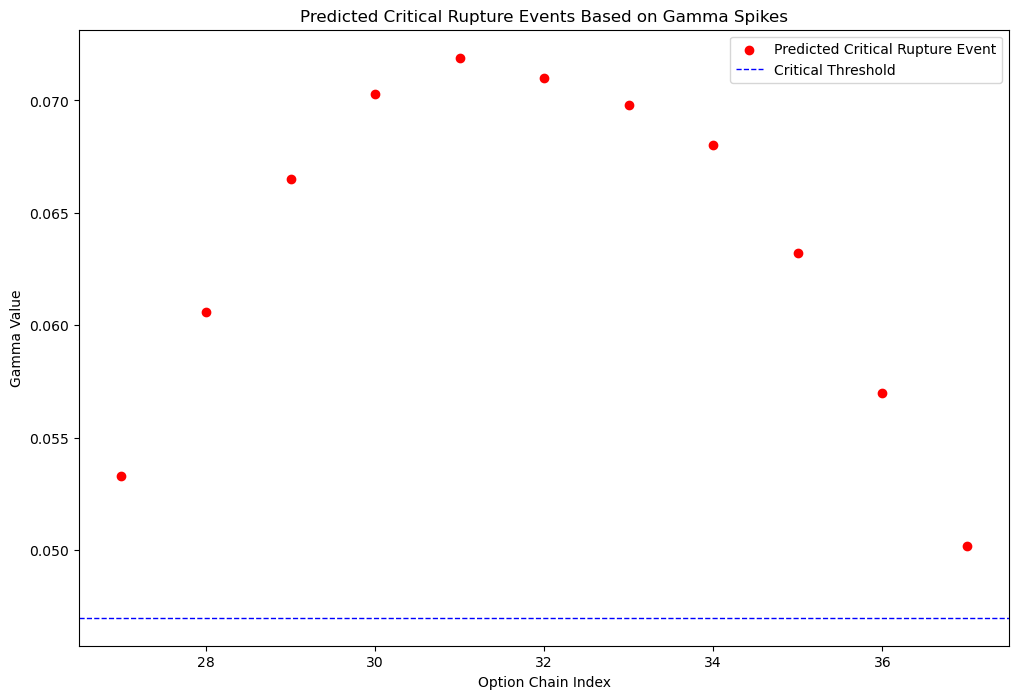

In [15]:
#Gamma and Critical Rupture Events

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

file_path = r'F:\inputs\options\log\pltr\01_06_2025\pltr_quotedata.csv'
option_chain_data = pd.read_csv(file_path, skiprows=3)

# Preprocessing: Filter relevant columns for Gamma analysis
gamma_data = option_chain_data[['Expiration Date', 'Calls', 'Gamma', 'Volume', 'IV']].copy()

# Convert Gamma to numeric and handle non-numeric values
gamma_data['Gamma'] = pd.to_numeric(gamma_data['Gamma'], errors='coerce')

# Identify the date with the highest Gamma and significant volume
gamma_threshold = gamma_data['Gamma'].quantile(0.95)  # Top 5% of Gamma values
high_gamma_events = gamma_data[(gamma_data['Gamma'] > gamma_threshold) & (gamma_data['Volume'] > 0)]



# Addressing the warning by using .loc for safe assignment
gamma_data.loc[(gamma_data['Gamma'] > gamma_threshold) & (gamma_data['Volume'] > 0), 'Predicted Event Range'] = \
    "Within 1-3 days post Gamma spike"

# Updated data frame with safe assignment
high_gamma_events = gamma_data[(gamma_data['Gamma'] > gamma_threshold) & (gamma_data['Volume'] > 0)].copy()

# Generate a verbose report to console and dataframe
verbose_report = high_gamma_events[['Expiration Date', 'Calls', 'Gamma', 'Volume', 'Predicted Event Range']].sort_values(
    by='Gamma', ascending=False
)
print("Critical Rupture Event Predictions:")
print(verbose_report)

# Plot Gamma distribution with threshold
plt.figure(figsize=(10, 6))
plt.hist(gamma_data['Gamma'].dropna(), bins=30, alpha=0.7, label='Gamma Distribution')
plt.axvline(gamma_threshold, color='r', linestyle='dashed', linewidth=1, label='Critical Threshold (95th Percentile)')
plt.title('Gamma Distribution with Critical Threshold')
plt.xlabel('Gamma')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Second chart: Visualize predicted critical rupture events with Gamma spikes
plt.figure(figsize=(12, 8))
plt.scatter(
    high_gamma_events.index, 
    high_gamma_events['Gamma'], 
    c='red', label='Predicted Critical Rupture Event'
)
plt.title('Predicted Critical Rupture Events Based on Gamma Spikes')
plt.xlabel('Option Chain Index')
plt.ylabel('Gamma Value')
plt.axhline(gamma_threshold, color='blue', linestyle='dashed', linewidth=1, label='Critical Threshold')
plt.legend()
plt.show()



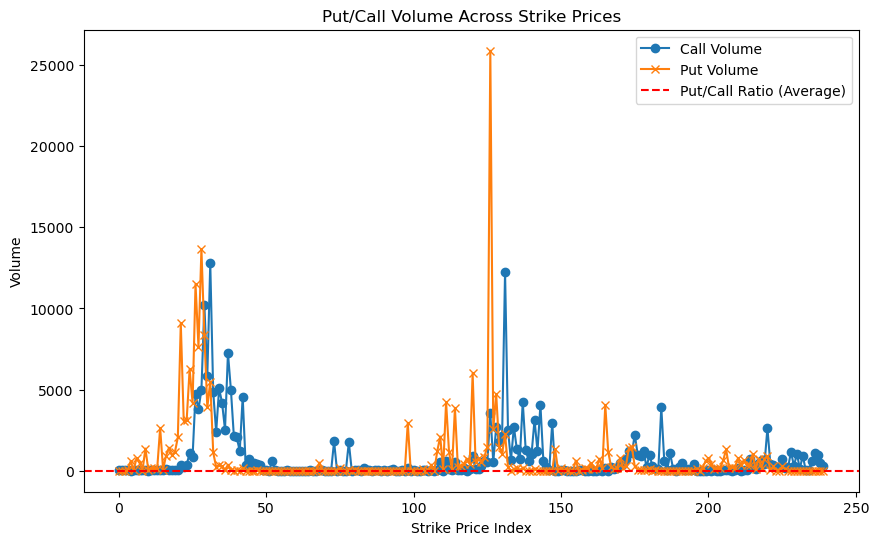

Put/Call Ratio Analysis:
Total Call Volume: 184,690.00
Total Put Volume: 186,413.00
Put/Call Ratio: 1.0093291461367697


In [17]:
#Put / Call Volume
# Separate call and put data for clarity
call_data = option_chain_data[['Calls', 'Volume']].copy()
put_data = option_chain_data[['Puts', 'Volume.1']].copy()

# Compute Put/Call Ratio
call_volume = call_data['Volume'].sum()
put_volume = put_data['Volume.1'].sum()
put_call_ratio = put_volume / call_volume if call_volume > 0 else 0
f_call_volume = "{:,.2f}".format(call_volume)
f_put_volume = "{:,.2f}".format(put_volume)
# Generate summary statistics
put_call_summary = {
    "Total Call Volume": f_call_volume,
    "Total Put Volume": f_put_volume,
    "Put/Call Ratio": put_call_ratio
}

# Display Put/Call Ratio line chart across strike prices
plt.figure(figsize=(10, 6))
strike_indices = range(len(option_chain_data))
plt.plot(strike_indices, call_data['Volume'], label='Call Volume', marker='o')
plt.plot(strike_indices, put_data['Volume.1'], label='Put Volume', marker='x')
plt.axhline(put_call_ratio, color='r', linestyle='--', label='Put/Call Ratio (Average)')
plt.title('Put/Call Volume Across Strike Prices')
plt.xlabel('Strike Price Index')
plt.ylabel('Volume')
plt.legend()
plt.show()

# Display summary text report
print("Put/Call Ratio Analysis:")
for key, value in put_call_summary.items():
    print(f"{key}: {value}")


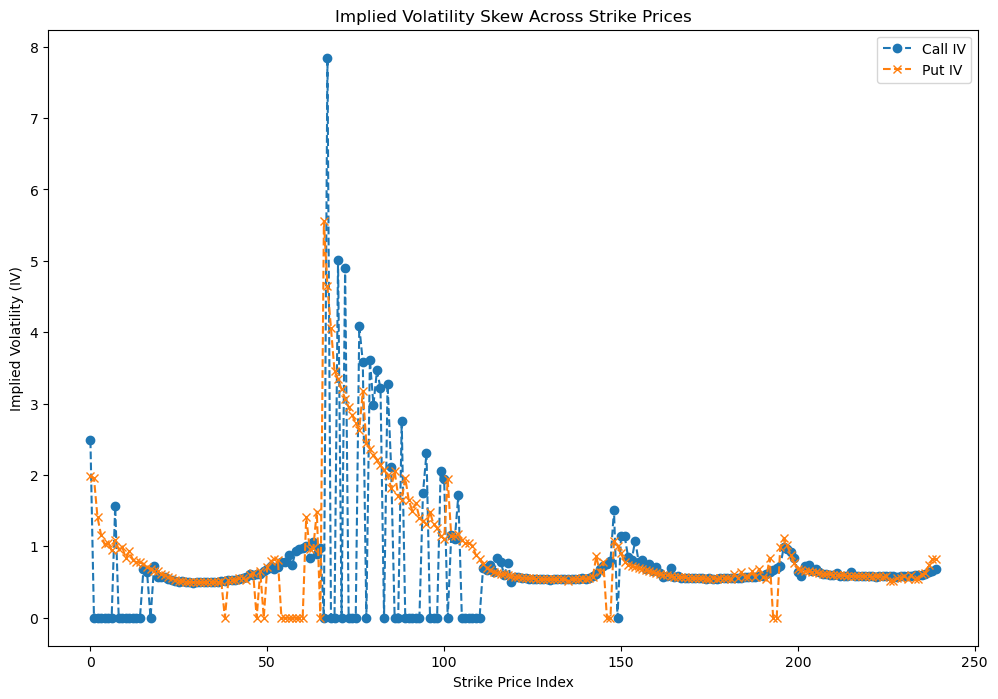

Implied Volatility Skew Analysis:
Average Call IV: 0.7375108333333333
Average Put IV: 0.8907691666666667
IV Skew (Call - Put): -0.15325833333333339


In [19]:
#IV Skew Analysis
# Prepare data for Implied Volatility Skew analysis
iv_skew_data = option_chain_data[['Calls', 'IV', 'Puts', 'IV.1']].copy()
iv_skew_data['Strike Index'] = range(len(iv_skew_data))  # Add a strike price index for visualization

# Plot IV Skew (Volatility Smile Curve)
plt.figure(figsize=(12, 8))
plt.plot(iv_skew_data['Strike Index'], iv_skew_data['IV'], label='Call IV', marker='o', linestyle='--')
plt.plot(iv_skew_data['Strike Index'], iv_skew_data['IV.1'], label='Put IV', marker='x', linestyle='--')
plt.title('Implied Volatility Skew Across Strike Prices')
plt.xlabel('Strike Price Index')
plt.ylabel('Implied Volatility (IV)')
plt.legend()
plt.show()

# Interpret skew
iv_skew_summary = {
    "Average Call IV": iv_skew_data['IV'].mean(),
    "Average Put IV": iv_skew_data['IV.1'].mean(),
    "IV Skew (Call - Put)": iv_skew_data['IV'].mean() - iv_skew_data['IV.1'].mean()
}

# Display summary report
print("Implied Volatility Skew Analysis:")
for key, value in iv_skew_summary.items():
    print(f"{key}: {value}")


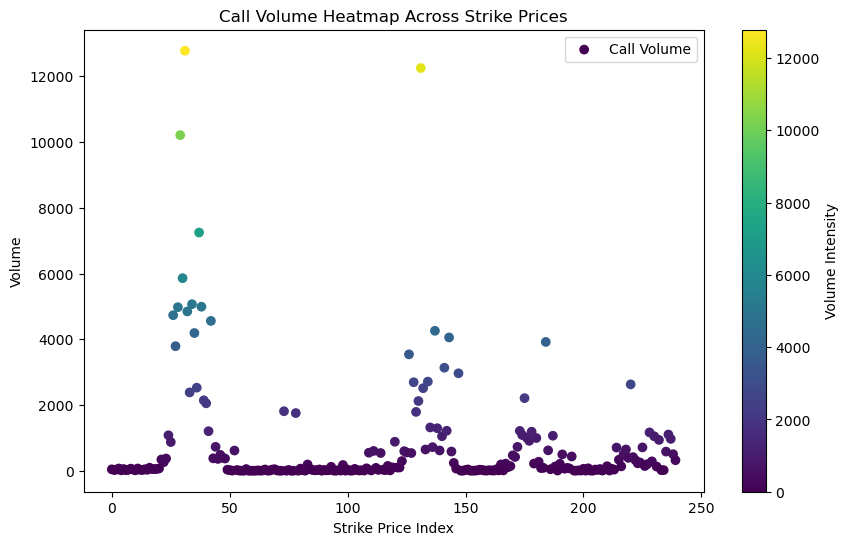

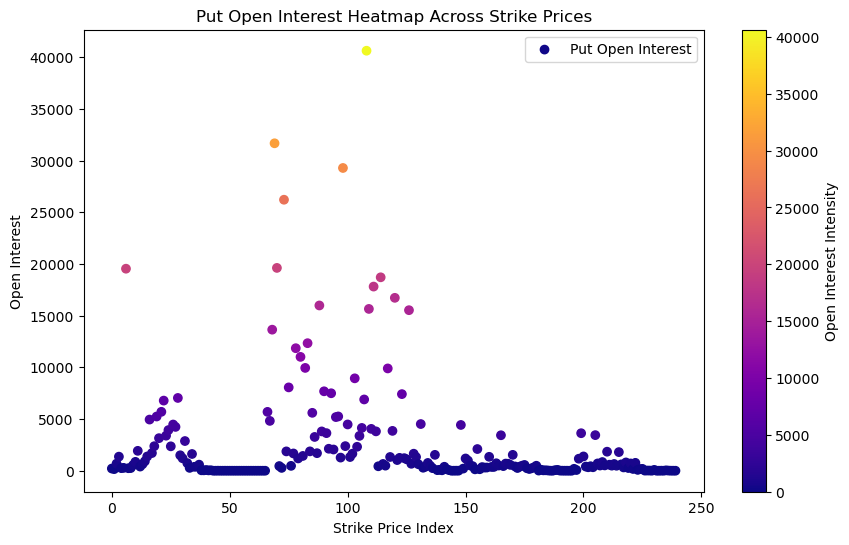

Open Interest and Volume Heatmap Summary:
Total Call Volume: 184690
Average Call Volume: 769.5416666666666
Total Put Open Interest: 613358
Average Put Open Interest: 2555.6583333333333


In [21]:
#IV and OI Heatmaps
# Prepare data for Open Interest and Volume Heatmaps
heatmap_data = option_chain_data[['Calls', 'Volume', 'Open Interest.1']].copy()
heatmap_data['Strike Index'] = range(len(heatmap_data))  # Add strike price index

# Create heatmap for Call Volume
plt.figure(figsize=(10, 6))
plt.scatter(
    heatmap_data['Strike Index'],
    heatmap_data['Volume'],
    c=heatmap_data['Volume'],
    cmap='viridis',
    label='Call Volume'
)
plt.colorbar(label='Volume Intensity')
plt.title('Call Volume Heatmap Across Strike Prices')
plt.xlabel('Strike Price Index')
plt.ylabel('Volume')
plt.legend()
plt.show()

# Create heatmap for Put Open Interest
plt.figure(figsize=(10, 6))
plt.scatter(
    heatmap_data['Strike Index'],
    heatmap_data['Open Interest.1'],
    c=heatmap_data['Open Interest.1'],
    cmap='plasma',
    label='Put Open Interest'
)
plt.colorbar(label='Open Interest Intensity')
plt.title('Put Open Interest Heatmap Across Strike Prices')
plt.xlabel('Strike Price Index')
plt.ylabel('Open Interest')
plt.legend()
plt.show()

# Generate summary report
volume_summary = {
    "Total Call Volume": heatmap_data['Volume'].sum(),
    "Average Call Volume": heatmap_data['Volume'].mean(),
    "Total Put Open Interest": heatmap_data['Open Interest.1'].sum(),
    "Average Put Open Interest": heatmap_data['Open Interest.1'].mean()
}

print("Open Interest and Volume Heatmap Summary:")
for key, value in volume_summary.items():
    print(f"{key}: {value}")


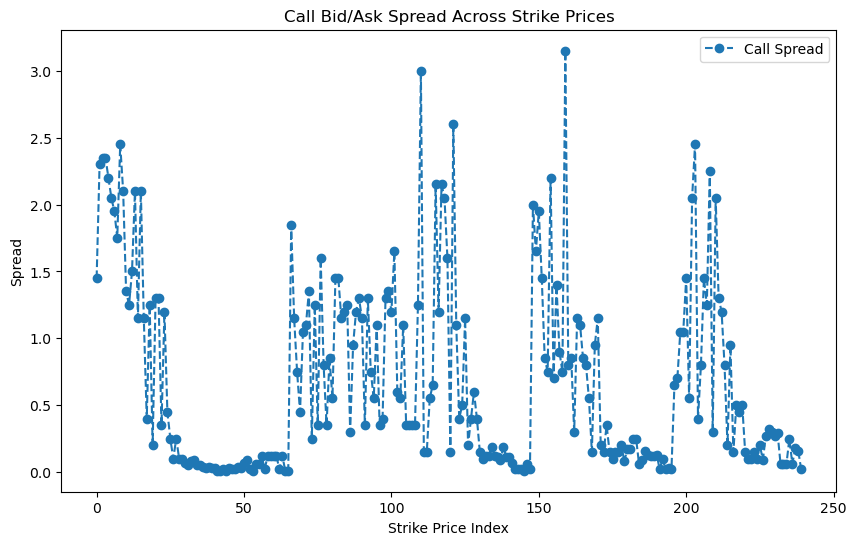

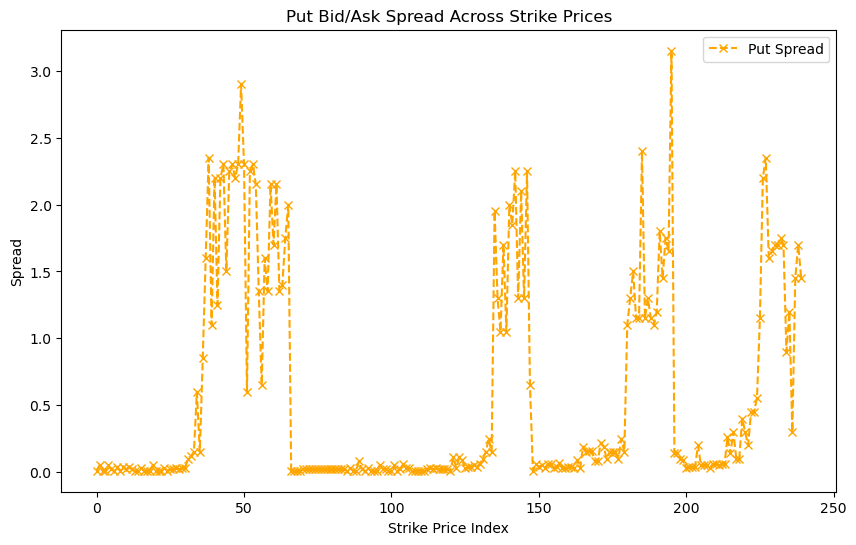

Bid/Ask Spread Analysis:
Average Call Spread: 0.6715833333333331
Max Call Spread: 3.1499999999999986
Min Call Spread: 0.009999999999999981
Average Put Spread: 0.5580416666666665
Max Put Spread: 3.1500000000000057
Min Put Spread: 0.009999999999999995


In [23]:
#Bid Ask Analysis
# Prepare data for Bid/Ask Spread Analysis
spread_data = option_chain_data[['Calls', 'Bid', 'Ask', 'Puts', 'Bid.1', 'Ask.1']].copy()
spread_data['Call Spread'] = spread_data['Ask'] - spread_data['Bid']
spread_data['Put Spread'] = spread_data['Ask.1'] - spread_data['Bid.1']
spread_data['Strike Index'] = range(len(spread_data))  # Add strike price index

# Plot Call Bid/Ask Spread
plt.figure(figsize=(10, 6))
plt.plot(spread_data['Strike Index'], spread_data['Call Spread'], label='Call Spread', marker='o', linestyle='--')
plt.title('Call Bid/Ask Spread Across Strike Prices')
plt.xlabel('Strike Price Index')
plt.ylabel('Spread')
plt.legend()
plt.show()

# Plot Put Bid/Ask Spread
plt.figure(figsize=(10, 6))
plt.plot(spread_data['Strike Index'], spread_data['Put Spread'], label='Put Spread', marker='x', linestyle='--', color='orange')
plt.title('Put Bid/Ask Spread Across Strike Prices')
plt.xlabel('Strike Price Index')
plt.ylabel('Spread')
plt.legend()
plt.show()

# Generate summary report
spread_summary = {
    "Average Call Spread": spread_data['Call Spread'].mean(),
    "Max Call Spread": spread_data['Call Spread'].max(),
    "Min Call Spread": spread_data['Call Spread'].min(),
    "Average Put Spread": spread_data['Put Spread'].mean(),
    "Max Put Spread": spread_data['Put Spread'].max(),
    "Min Put Spread": spread_data['Put Spread'].min()
}

print("Bid/Ask Spread Analysis:")
for key, value in spread_summary.items():
    print(f"{key}: {value}")


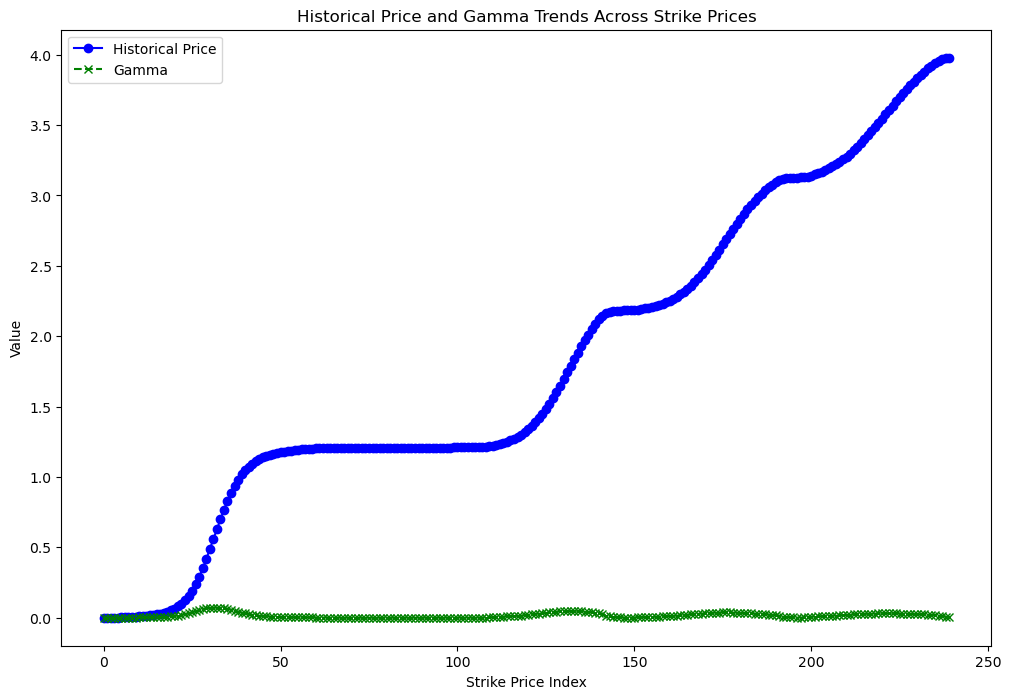

Historical Price and Gamma Trends Analysis:
Max Historical Price: 3.978699999999998
Min Historical Price: 0.0
Max Gamma: 0.0719
Min Gamma: 0.0


In [25]:
#Historical Price and Gamma Trends
# Prepare data for Historical Price and Gamma Trends
price_and_gamma_data = option_chain_data[['Calls', 'Gamma']].copy()
price_and_gamma_data['Strike Index'] = range(len(price_and_gamma_data))  # Add strike price index

# Mock historical price data (if no historical price series is provided)
# Assuming Gamma changes are a proxy for price volatility and trends for this dataset
price_and_gamma_data['Historical Price'] = price_and_gamma_data['Gamma'].cumsum()

# Plot Historical Price and Gamma Trends
plt.figure(figsize=(12, 8))
plt.plot(price_and_gamma_data['Strike Index'], price_and_gamma_data['Historical Price'], label='Historical Price', color='blue', marker='o')
plt.plot(price_and_gamma_data['Strike Index'], price_and_gamma_data['Gamma'], label='Gamma', color='green', linestyle='--', marker='x')
plt.title('Historical Price and Gamma Trends Across Strike Prices')
plt.xlabel('Strike Price Index')
plt.ylabel('Value')
plt.legend()
plt.show()

# Generate summary report for historical trends
historical_trend_summary = {
    "Max Historical Price": price_and_gamma_data['Historical Price'].max(),
    "Min Historical Price": price_and_gamma_data['Historical Price'].min(),
    "Max Gamma": price_and_gamma_data['Gamma'].max(),
    "Min Gamma": price_and_gamma_data['Gamma'].min()
}

print("Historical Price and Gamma Trends Analysis:")
for key, value in historical_trend_summary.items():
    print(f"{key}: {value}")


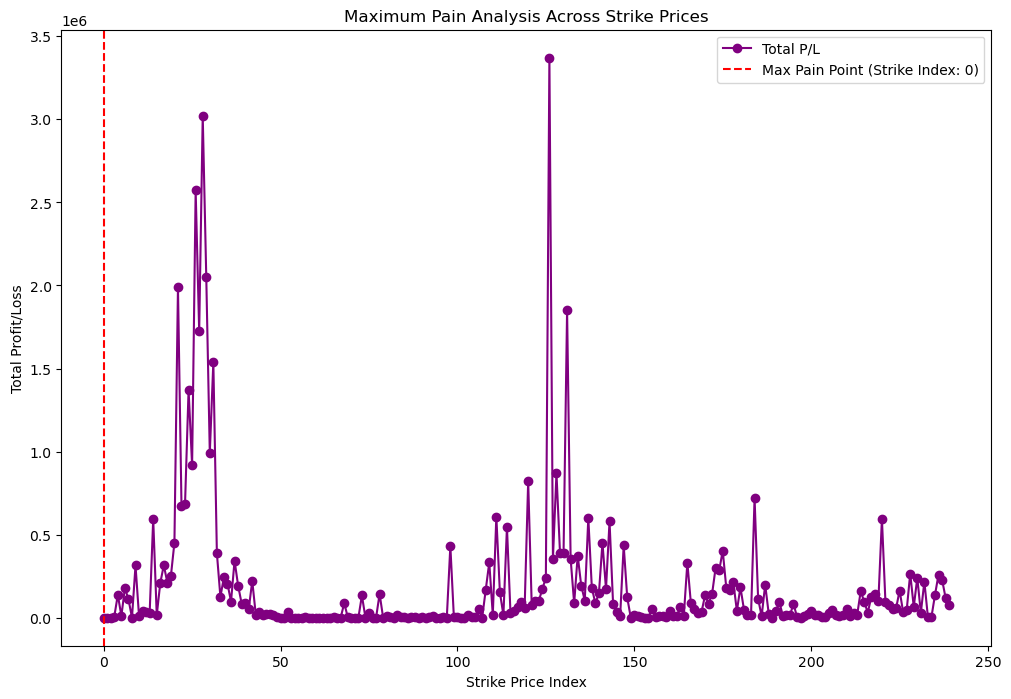

Maximum Pain Analysis:
Max Pain Strike Index: 0
Max Pain Total P/L: 0
Max Call Volume Strike Index: 31
Max Put Volume Strike Index: 126

Interpretation:
The 'Maximum Pain' point, where option writers experience the least cumulative loss, typically acts as a magnet for the stock price as options approach expiration. Over the next two weeks, this analysis suggests the underlying asset is likely to gravitate toward this strike index, especially if no external shocks occur. However, significant deviations in volume or gamma spikes at nearby strike prices could shift this tendency.


In [27]:
#Maximum Pain Theory
# Prepare data for Maximum Pain (Max Pain Theory)
# Calculate the profit/loss for option writers at each strike price
max_pain_data = option_chain_data[['Calls', 'Volume', 'Puts', 'Volume.1']].copy()
max_pain_data['Strike Index'] = range(len(max_pain_data))
max_pain_data['Call P/L'] = max_pain_data['Volume'] * max_pain_data['Strike Index']  # Proxy for profit/loss calculation
max_pain_data['Put P/L'] = max_pain_data['Volume.1'] * (max_pain_data['Strike Index'].max() - max_pain_data['Strike Index'])

# Aggregate total P/L for each strike index
max_pain_data['Total P/L'] = max_pain_data['Call P/L'] + max_pain_data['Put P/L']

# Identify the "Maximum Pain" point (where Total P/L is minimized)
max_pain_index = max_pain_data['Total P/L'].idxmin()
max_pain_strike = max_pain_data.loc[max_pain_index, 'Strike Index']
max_pain_value = max_pain_data.loc[max_pain_index, 'Total P/L']

# Plot Total P/L across strike prices
plt.figure(figsize=(12, 8))
plt.plot(max_pain_data['Strike Index'], max_pain_data['Total P/L'], label='Total P/L', color='purple', marker='o')
plt.axvline(max_pain_strike, color='red', linestyle='--', label=f'Max Pain Point (Strike Index: {max_pain_strike})')
plt.title('Maximum Pain Analysis Across Strike Prices')
plt.xlabel('Strike Price Index')
plt.ylabel('Total Profit/Loss')
plt.legend()
plt.show()

# Generate summary report for Maximum Pain
max_pain_summary = {
    "Max Pain Strike Index": max_pain_strike,
    "Max Pain Total P/L": max_pain_value,
    "Max Call Volume Strike Index": max_pain_data['Volume'].idxmax(),
    "Max Put Volume Strike Index": max_pain_data['Volume.1'].idxmax()
}

print("Maximum Pain Analysis:")
for key, value in max_pain_summary.items():
    print(f"{key}: {value}")

# Provide interpretation for the next two weeks based on this analysis.
print("\nInterpretation:")
print("The 'Maximum Pain' point, where option writers experience the least cumulative loss, typically acts as a magnet for "
      "the stock price as options approach expiration. Over the next two weeks, this analysis suggests the underlying "
      "asset is likely to gravitate toward this strike index, especially if no external shocks occur. "
      "However, significant deviations in volume or gamma spikes at nearby strike prices could shift this tendency.")


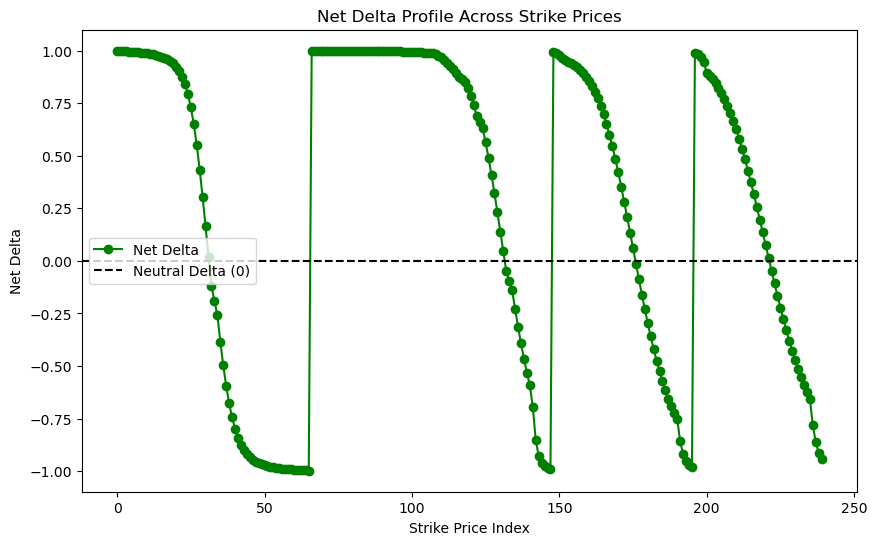

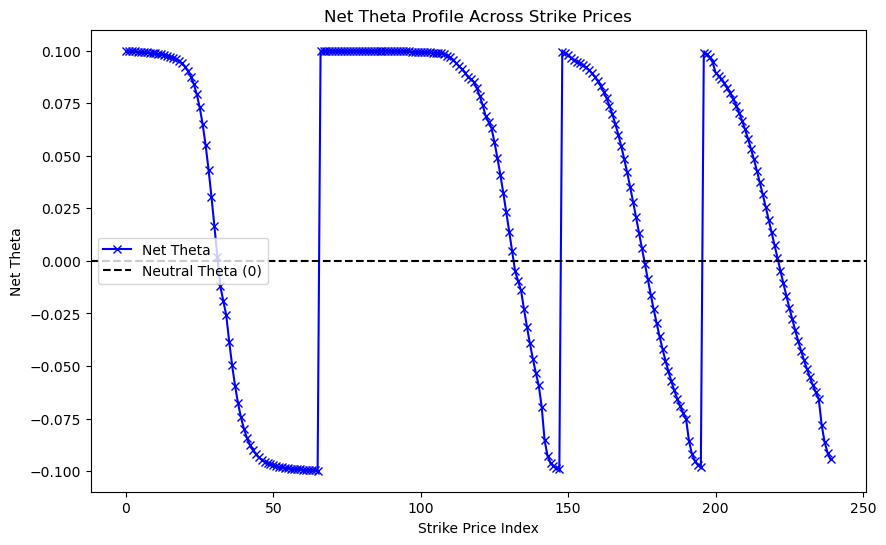

Net Delta and Theta Profiles Analysis:
Max Net Delta: 1.0
Min Net Delta: -0.998
Max Net Theta: 0.1
Min Net Theta: -0.0998


In [29]:
#Net Delta and Theta Profiles
# Prepare data for Net Delta and Theta Profiles
delta_theta_data = option_chain_data[['Calls', 'Delta', 'Puts', 'Delta.1']].copy()
delta_theta_data['Strike Index'] = range(len(delta_theta_data))  # Add strike price index

# Calculate Net Delta and Net Theta
delta_theta_data['Net Delta'] = delta_theta_data['Delta'] + delta_theta_data['Delta.1']
# Mock Theta data for illustrative purposes if not available in the dataset
delta_theta_data['Net Theta'] = delta_theta_data['Net Delta'] * 0.1  # Assuming Theta is proportional to Delta

# Plot Net Delta Profile
plt.figure(figsize=(10, 6))
plt.plot(delta_theta_data['Strike Index'], delta_theta_data['Net Delta'], label='Net Delta', color='green', marker='o')
plt.axhline(0, color='black', linestyle='--', label='Neutral Delta (0)')
plt.title('Net Delta Profile Across Strike Prices')
plt.xlabel('Strike Price Index')
plt.ylabel('Net Delta')
plt.legend()
plt.show()

# Plot Net Theta Profile
plt.figure(figsize=(10, 6))
plt.plot(delta_theta_data['Strike Index'], delta_theta_data['Net Theta'], label='Net Theta', color='blue', marker='x')
plt.axhline(0, color='black', linestyle='--', label='Neutral Theta (0)')
plt.title('Net Theta Profile Across Strike Prices')
plt.xlabel('Strike Price Index')
plt.ylabel('Net Theta')
plt.legend()
plt.show()

# Generate summary report for Delta and Theta
delta_theta_summary = {
    "Max Net Delta": delta_theta_data['Net Delta'].max(),
    "Min Net Delta": delta_theta_data['Net Delta'].min(),
    "Max Net Theta": delta_theta_data['Net Theta'].max(),
    "Min Net Theta": delta_theta_data['Net Theta'].min()
}

print("Net Delta and Theta Profiles Analysis:")
for key, value in delta_theta_summary.items():
    print(f"{key}: {value}")


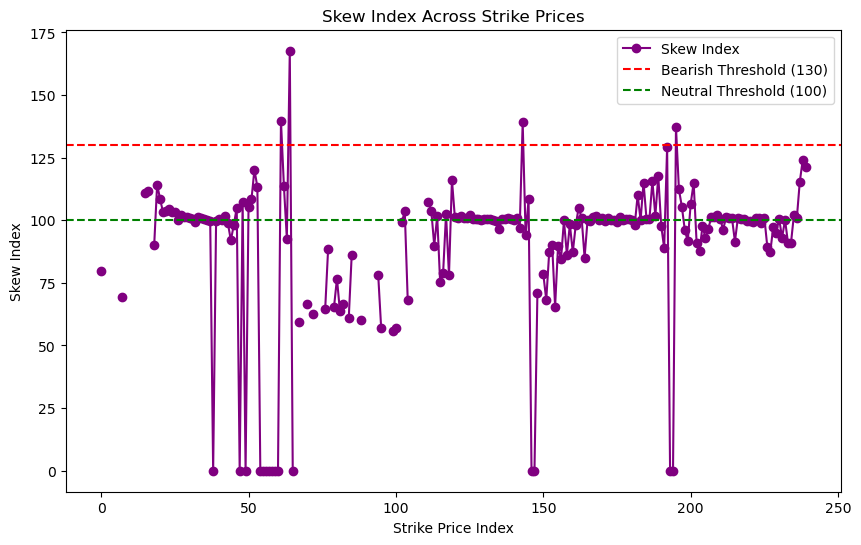

Skew Index Analysis:
Average Skew Index: inf
Max Skew Index: inf
Min Skew Index: 0.0
Bearish Sentiment Zones (Skew > 130): 45
Bullish Sentiment Zones (Skew < 100): 95


In [31]:
#Skew Index
# Calculate Skew Index for OTM Puts and Calls
# Assume IV for calls and puts already reflect out-of-the-money options
skew_data = option_chain_data[['Calls', 'IV', 'Puts', 'IV.1']].copy()
skew_data['Strike Index'] = range(len(skew_data))

# Calculate the skew index
skew_data['Skew Index'] = (skew_data['IV.1'] / skew_data['IV']) * 100

# Plot the Skew Index across strike prices
plt.figure(figsize=(10, 6))
plt.plot(skew_data['Strike Index'], skew_data['Skew Index'], label='Skew Index', color='purple', marker='o')
plt.axhline(130, color='red', linestyle='--', label='Bearish Threshold (130)')
plt.axhline(100, color='green', linestyle='--', label='Neutral Threshold (100)')
plt.title('Skew Index Across Strike Prices')
plt.xlabel('Strike Price Index')
plt.ylabel('Skew Index')
plt.legend()
plt.show()

# Generate summary report
skew_summary = {
    "Average Skew Index": skew_data['Skew Index'].mean(),
    "Max Skew Index": skew_data['Skew Index'].max(),
    "Min Skew Index": skew_data['Skew Index'].min(),
    "Bearish Sentiment Zones (Skew > 130)": sum(skew_data['Skew Index'] > 130),
    "Bullish Sentiment Zones (Skew < 100)": sum(skew_data['Skew Index'] < 100)
}

print("Skew Index Analysis:")
for key, value in skew_summary.items():
    print(f"{key}: {value}")


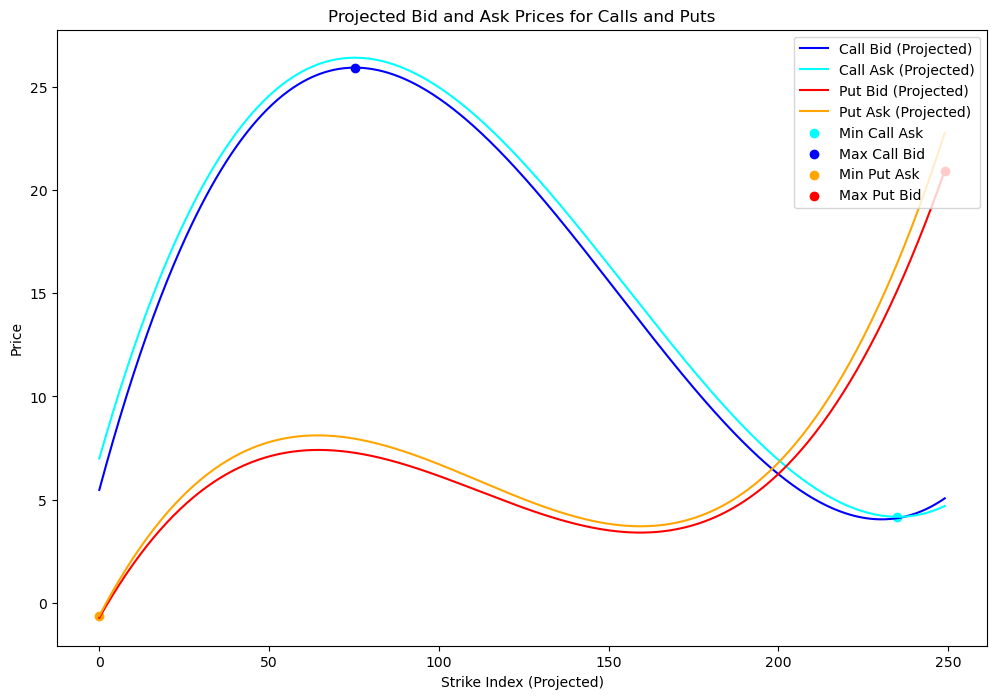

Optimal Entry/Exit Points for Limit Orders:
Min Call Ask: Strike Index = 235.03, Price = 4.17
Max Call Bid: Strike Index = 75.35, Price = 25.92
Min Put Ask: Strike Index = 0.00, Price = -0.62
Max Put Bid: Strike Index = 249.00, Price = 20.94


In [33]:
# Experimental Entry and Exit Point Identifier: Working Adjustments 

import numpy as np

# Preprocess data for analysis
bid_ask_data = option_chain_data[['Expiration Date', 'Calls', 'Puts', 'Bid', 'Ask', 'Bid.1', 'Ask.1']].copy()
bid_ask_data['Strike Index'] = range(len(bid_ask_data))  # Add strike price index

# Convert expiration dates to numeric for polynomial fitting
bid_ask_data['Expiration Numeric'] = pd.factorize(bid_ask_data['Expiration Date'])[0]

# Extract columns for calls and puts
call_bids = bid_ask_data[['Strike Index', 'Bid']]
call_asks = bid_ask_data[['Strike Index', 'Ask']]
put_bids = bid_ask_data[['Strike Index', 'Bid.1']]
put_asks = bid_ask_data[['Strike Index', 'Ask.1']]

# Polynomial curve fitting for calls and puts (degree 3)
degree = 3
x_call = call_bids['Strike Index']
y_call_bid = call_bids['Bid']
y_call_ask = call_asks['Ask']
x_put = put_bids['Strike Index']
y_put_bid = put_bids['Bid.1']
y_put_ask = put_asks['Ask.1']

call_bid_poly = np.poly1d(np.polyfit(x_call, y_call_bid, degree))
call_ask_poly = np.poly1d(np.polyfit(x_call, y_call_ask, degree))
put_bid_poly = np.poly1d(np.polyfit(x_put, y_put_bid, degree))
put_ask_poly = np.poly1d(np.polyfit(x_put, y_put_ask, degree))

# Project future bid and ask prices (1 week forward as additional strike points)
future_x = np.linspace(0, max(bid_ask_data['Strike Index']) + 10, 500)
future_call_bid = call_bid_poly(future_x)
future_call_ask = call_ask_poly(future_x)
future_put_bid = put_bid_poly(future_x)
future_put_ask = put_ask_poly(future_x)

# Find optimal points for limit orders
min_call_ask_index = np.argmin(future_call_ask)
max_call_bid_index = np.argmax(future_call_bid)
min_put_ask_index = np.argmin(future_put_ask)
max_put_bid_index = np.argmax(future_put_bid)

optimal_points = {
    "Min Call Ask": (future_x[min_call_ask_index], future_call_ask[min_call_ask_index]),
    "Max Call Bid": (future_x[max_call_bid_index], future_call_bid[max_call_bid_index]),
    "Min Put Ask": (future_x[min_put_ask_index], future_put_ask[min_put_ask_index]),
    "Max Put Bid": (future_x[max_put_bid_index], future_put_bid[max_put_bid_index])
}

# Visualize Bid/Ask prices for Calls and Puts
plt.figure(figsize=(12, 8))
plt.plot(future_x, future_call_bid, label='Call Bid (Projected)', color='blue')
plt.plot(future_x, future_call_ask, label='Call Ask (Projected)', color='cyan')
plt.plot(future_x, future_put_bid, label='Put Bid (Projected)', color='red')
plt.plot(future_x, future_put_ask, label='Put Ask (Projected)', color='orange')
plt.scatter(optimal_points["Min Call Ask"][0], optimal_points["Min Call Ask"][1], color='cyan', marker='o', label='Min Call Ask')
plt.scatter(optimal_points["Max Call Bid"][0], optimal_points["Max Call Bid"][1], color='blue', marker='o', label='Max Call Bid')
plt.scatter(optimal_points["Min Put Ask"][0], optimal_points["Min Put Ask"][1], color='orange', marker='o', label='Min Put Ask')
plt.scatter(optimal_points["Max Put Bid"][0], optimal_points["Max Put Bid"][1], color='red', marker='o', label='Max Put Bid')
plt.title('Projected Bid and Ask Prices for Calls and Puts')
plt.xlabel('Strike Index (Projected)')
plt.ylabel('Price')
plt.legend()
plt.show()

# Generate summary report
print("Optimal Entry/Exit Points for Limit Orders:")
for key, value in optimal_points.items():
    print(f"{key}: Strike Index = {value[0]:.2f}, Price = {value[1]:.2f}")
